In [20]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows


In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import geopandas as gpd
import folium
from folium.plugins import HeatMap


In [5]:
crime_df = pd.read_csv("/Users/rashidbaset/Documents/my-projects/crime-home-price-prediction-capstone/chicago-crime-property-analysis/crime_2014_2023.csv")

In [6]:
crime_df.head(5)

,date,location,district,block,y_coordinate,latitude,description,location_description,updated_on,community_area,...,ward,case_number,year,domestic,fbi_code,longitude,beat,primary_type,arrest,id
0,2023-12-31 23:59:00,"{'latitude': '41.900698378', 'human_address': ...",18.0,010XX N ORLEANS ST,1907173.0,41.900698,TO VEHICLE,STREET,2024-01-08T15:59:56.000,8.0,...,27.0,JH103488,2023,False,14,-87.637330,1823,CRIMINAL DAMAGE,False,13327763
1,2023-12-31 23:51:00,"{'latitude': '41.754966726', 'human_address': ...",6.0,009XX E 77TH ST,1854148.0,41.754967,AGGRAVATED - OTHER DANGEROUS WEAPON,APARTMENT,2024-01-08T15:59:56.000,69.0,...,8.0,JH100010,2023,True,04A,-87.602411,624,ASSAULT,False,13324997
2,2023-12-31 23:51:00,"{'latitude': '41.801583507', 'human_address': ...",9.0,051XX S PRINCETON AVE,1871065.0,41.801584,AGGRAVATED POLICE OFFICER - HANDGUN,STREET,2024-01-08T15:59:56.000,37.0,...,20.0,JH100002,2023,False,04A,-87.633177,935,ASSAULT,False,13325009
3,2023-12-31 23:50:00,"{'latitude': '41.906519104', 'human_address': ...",25.0,014XX N LOCKWOOD AVE,1909050.0,41.906519,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",STREET,2024-01-08T15:59:56.000,25.0,...,37.0,JG561343,2023,False,08B,-87.758360,2532,BATTERY,False,13324829
4,2023-12-31 23:50:00,"{'latitude': '41.800200965', 'human_address': ...",9.0,051XX S WASHTENAW AVE,1870437.0,41.800201,DOMESTIC BATTERY SIMPLE,RESIDENCE,2024-01-08T15:59:56.000,63.0,...,14.0,JH100006,2023,True,08B,-87.691535,923,BATTERY,False,13324881


In [27]:
import geopandas as gpd
from shapely.geometry import Point

crime_geometry = [Point(xy) for xy in zip(crime_df['longitude'], crime_df['latitude'])]

crime_gdf = gpd.GeoDataFrame(crime_df, geometry=crime_geometry, crs='EPSG:4326')

neighborhoods = gpd.read_file('/Users/rashidbaset/Documents/my-projects/crime-home-price-prediction-capstone/chicago-crime-property-analysis/boundries-chicago.geojson')

crime_gdf = gpd.sjoin(crime_gdf, neighborhoods, op='within')


/Users/rashidbaset/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [31]:
crime_gdf.head(5)

,date,location,district,block,y_coordinate,latitude,description,location_description,updated_on,community_area,iucr,x_coordinate,ward,case_number,year,domestic,fbi_code,longitude,beat,primary_type,arrest,id,Date,Year,Month,geometry,index_right,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len
0,2023-12-31 23:59:00,"{'latitude': '41.900698378', 'human_address': ...",18.0,010XX N ORLEANS ST,1907173.0,41.900698,TO VEHICLE,STREET,2024-01-08T15:59:56.000,8.0,1320,1173727.0,27.0,JH103488,2023,False,14,-87.637330,1823,CRIMINAL DAMAGE,False,13327763,2023-12-31 23:59:00,2023,12,POINT (-87.63733 41.90070),36,NEAR NORTH SIDE,0,76675895.9728,0,8,8,0,0,57293.1649516
8,2023-12-31 23:40:00,"{'latitude': '41.892753031', 'human_address': ...",18.0,006XX N MICHIGAN AVE,1904307.0,41.892753,AUTOMOBILE,STREET,2024-01-08T15:59:56.000,8.0,0910,1177327.0,42.0,JH100137,2023,False,07,-87.624194,1834,MOTOR VEHICLE THEFT,False,13324894,2023-12-31 23:40:00,2023,12,POINT (-87.62419 41.89275),36,NEAR NORTH SIDE,0,76675895.9728,0,8,8,0,0,57293.1649516
12,2023-12-31 23:31:00,"{'latitude': '41.887919288', 'human_address': ...",18.0,003XX N STATE ST,1902537.0,41.887919,OTHER VIOLATION,STREET,2024-01-08T15:59:56.000,8.0,2890,1176300.0,42.0,JH100154,2023,False,24,-87.628019,1831,PUBLIC PEACE VIOLATION,True,13324901,2023-12-31 23:31:00,2023,12,POINT (-87.62802 41.88792),36,NEAR NORTH SIDE,0,76675895.9728,0,8,8,0,0,57293.1649516
46,2023-12-31 22:34:00,"{'latitude': '41.909959349', 'human_address': ...",18.0,015XX N SEDGWICK ST,1910545.0,41.909959,SIMPLE,APARTMENT,2024-01-08T15:59:56.000,8.0,0460,1173366.0,27.0,JG561296,2023,False,08B,-87.638555,1821,BATTERY,False,13325268,2023-12-31 22:34:00,2023,12,POINT (-87.63856 41.90996),36,NEAR NORTH SIDE,0,76675895.9728,0,8,8,0,0,57293.1649516
77,2023-12-31 21:40:00,"{'latitude': '41.903165497', 'human_address': ...",18.0,0000X W ELM ST,1908090.0,41.903165,UNLAWFUL POSSESSION - HANDGUN,STREET,2024-01-08T15:59:56.000,8.0,143A,1175923.0,2.0,JG561305,2023,False,15,-87.629236,1824,WEAPONS VIOLATION,True,13324787,2023-12-31 21:40:00,2023,12,POINT (-87.62924 41.90317),36,NEAR NORTH SIDE,0,76675895.9728,0,8,8,0,0,57293.1649516


In [35]:
neighborhood_categories = {
    "South Side": [
        "SOUTH SHORE", "AUBURN GRESHAM", "ROSELAND", "CHATHAM", "GREATER GRAND CROSSING",
        "SOUTH CHICAGO", "CHICAGO LAWN", "ENGLEWOOD", "WEST PULLMAN", "GARFIELD RIDGE",
        "ASHBURN", "AVALON PARK", "MORGAN PARK", "GRAND BOULEVARD", "WOODLAWN", "SOUTH LAWNDALE",
        "KENWOOD", "CALUMET HEIGHTS", "DOUGLAS", "GAGE PARK", "WEST ELSDON", "SOUTH DEERING",
        "HEGEWISCH", "AVALON PARK", "WASHINGTON PARK", "ARMOUR SQUARE", "PULLMAN", "OAKLAND",
        "FULLER PARK", "BURNSIDE", "RIVERDALE"
    ],
    "Southwest Side": [
        "CLEARING", "WEST LAWN", "WEST ELSDON", "GARFIELD RIDGE",
        "ARCHER HEIGHTS", "BRIGHTON PARK", "MCKINLEY PARK"
    ],
    "Far Southwest Side": [
        "MOUNT GREENWOOD", "BEVERLY", "WASHINGTON HEIGHTS"
    ],
    "Southeast Side": [
        "HEGEWISCH", "SOUTH DEERING"
    ],
    "Central": [
        "NEAR NORTH SIDE", "LAKE VIEW", "WEST TOWN", "LINCOLN PARK", "NEAR WEST SIDE", "LOOP", "LOGAN SQUARE",
        "EDGEWATER", "UPTOWN"
    ],
    "Far North Side": [
        "ROGERS PARK", "NORWOOD PARK", "DUNNING", "EDISON PARK", "NORTH PARK"
    ],
    "North Side": [
        "NORTH CENTER", "LAKE VIEW", "LINCOLN PARK", "EDGEWATER", "UPTOWN"
    ],
    "Northwest Side": [
        "PORTAGE PARK", "WEST RIDGE", "IRVING PARK", "ALBANY PARK", "JEFFERSON PARK", "MONTCLARE", "HERMOSA"
    ],
    "West Side": [
        "AUSTIN", "WEST ENGLEWOOD", "BELMONT CRAGIN", "HUMBOLDT PARK", "AVONDALE", "NEW CITY", "CLEARING",
        "NORTH LAWNDALE", "BRIDGEPORT", "MOUNT GREENWOOD", "FOREST GLEN", "SOUTH LAWNDALE", "KENWOOD",
        "OHARE", "LOWER WEST SIDE", "EAST GARFIELD PARK", "EAST SIDE", "WEST GARFIELD PARK", "CALUMET HEIGHTS",
        "DOUGLAS", "WEST ELSDON", "HEGEWISCH", "AVALON PARK", "MCKINLEY PARK", "HERMOSA", "WASHINGTON PARK",
        "ARMOUR SQUARE", "ARCHER HEIGHTS", "PULLMAN", "OAKLAND", "FULLER PARK", "BURNSIDE", "RIVERDALE"
    ]
}

crime_gdf['Neighborhood'] = crime_gdf['community'].apply(lambda x: next((k for k, v in neighborhood_categories.items() if x in v), 'Other'))



In [37]:
crime_gdf.head(5)

,date,location,district,block,y_coordinate,latitude,description,location_description,updated_on,community_area,iucr,x_coordinate,ward,case_number,year,domestic,fbi_code,longitude,beat,primary_type,arrest,id,Date,Year,Month,geometry,index_right,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,Neighborhood
0,2023-12-31 23:59:00,"{'latitude': '41.900698378', 'human_address': ...",18.0,010XX N ORLEANS ST,1907173.0,41.900698,TO VEHICLE,STREET,2024-01-08T15:59:56.000,8.0,1320,1173727.0,27.0,JH103488,2023,False,14,-87.637330,1823,CRIMINAL DAMAGE,False,13327763,2023-12-31 23:59:00,2023,12,POINT (-87.63733 41.90070),36,NEAR NORTH SIDE,0,76675895.9728,0,8,8,0,0,57293.1649516,Central
8,2023-12-31 23:40:00,"{'latitude': '41.892753031', 'human_address': ...",18.0,006XX N MICHIGAN AVE,1904307.0,41.892753,AUTOMOBILE,STREET,2024-01-08T15:59:56.000,8.0,0910,1177327.0,42.0,JH100137,2023,False,07,-87.624194,1834,MOTOR VEHICLE THEFT,False,13324894,2023-12-31 23:40:00,2023,12,POINT (-87.62419 41.89275),36,NEAR NORTH SIDE,0,76675895.9728,0,8,8,0,0,57293.1649516,Central
12,2023-12-31 23:31:00,"{'latitude': '41.887919288', 'human_address': ...",18.0,003XX N STATE ST,1902537.0,41.887919,OTHER VIOLATION,STREET,2024-01-08T15:59:56.000,8.0,2890,1176300.0,42.0,JH100154,2023,False,24,-87.628019,1831,PUBLIC PEACE VIOLATION,True,13324901,2023-12-31 23:31:00,2023,12,POINT (-87.62802 41.88792),36,NEAR NORTH SIDE,0,76675895.9728,0,8,8,0,0,57293.1649516,Central
46,2023-12-31 22:34:00,"{'latitude': '41.909959349', 'human_address': ...",18.0,015XX N SEDGWICK ST,1910545.0,41.909959,SIMPLE,APARTMENT,2024-01-08T15:59:56.000,8.0,0460,1173366.0,27.0,JG561296,2023,False,08B,-87.638555,1821,BATTERY,False,13325268,2023-12-31 22:34:00,2023,12,POINT (-87.63856 41.90996),36,NEAR NORTH SIDE,0,76675895.9728,0,8,8,0,0,57293.1649516,Central
77,2023-12-31 21:40:00,"{'latitude': '41.903165497', 'human_address': ...",18.0,0000X W ELM ST,1908090.0,41.903165,UNLAWFUL POSSESSION - HANDGUN,STREET,2024-01-08T15:59:56.000,8.0,143A,1175923.0,2.0,JG561305,2023,False,15,-87.629236,1824,WEAPONS VIOLATION,True,13324787,2023-12-31 21:40:00,2023,12,POINT (-87.62924 41.90317),36,NEAR NORTH SIDE,0,76675895.9728,0,8,8,0,0,57293.1649516,Central


# Temporal Trends Analysis

## Yearly and Monthly Crime Trends

/Users/rashidbaset/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rashidbaset/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


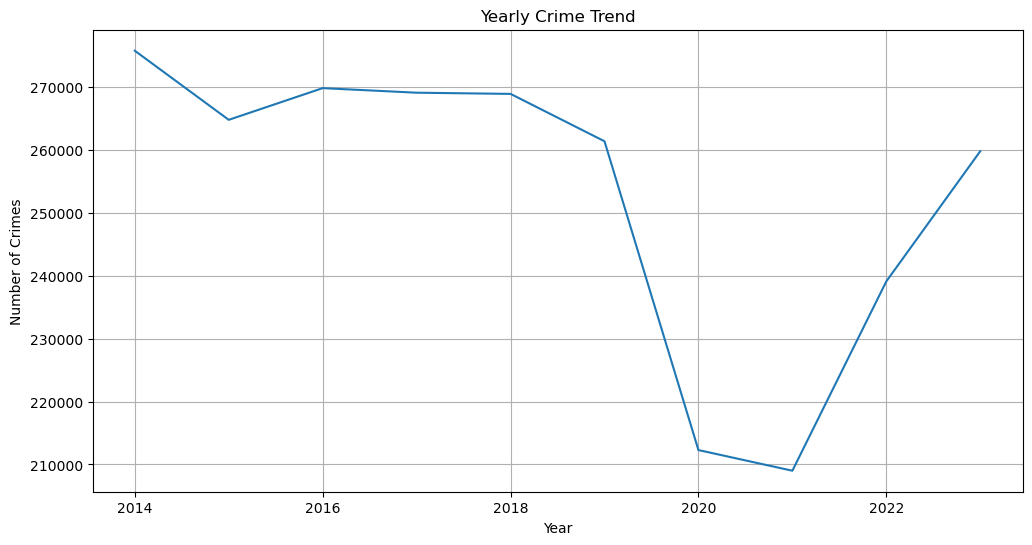

/Users/rashidbaset/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rashidbaset/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


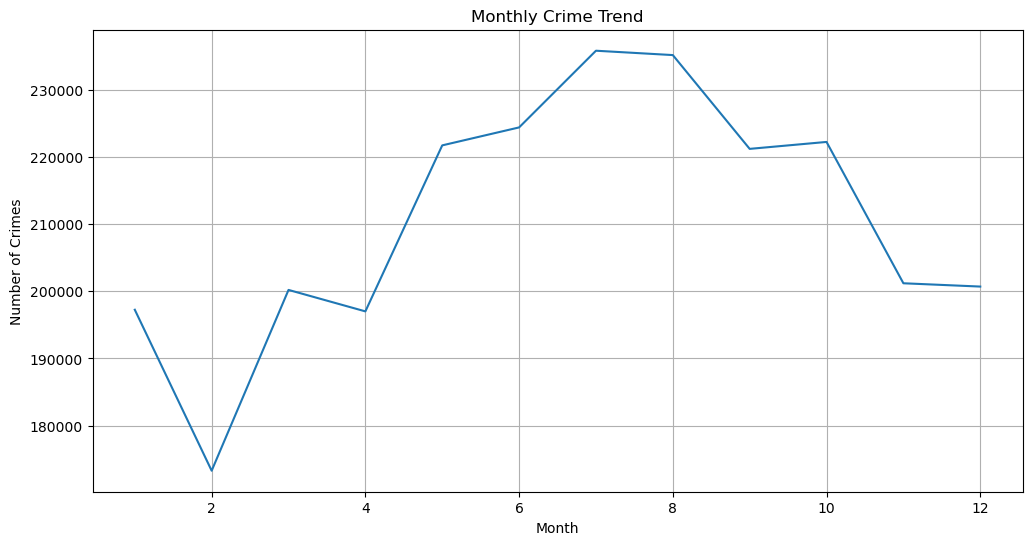

In [12]:
crime_df['date'] = pd.to_datetime(crime_df['date'])

crime_df['Year'] = crime_df['date'].dt.year
crime_df['Month'] = crime_df['date'].dt.month

yearly_crime_counts = crime_df['Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_crime_counts.index, y=yearly_crime_counts.values)
plt.title('Yearly Crime Trend')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

monthly_crime_counts = crime_df['Month'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_crime_counts.index, y=monthly_crime_counts.values)
plt.title('Monthly Crime Trend')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()


## Day of Week and Time Analysis

/var/folders/pp/77rpffxd5pl6p9fys4m6t7y00000gn/T/ipykernel_62439/3073974817.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['DayOfWeek'] = filtered_data['Date'].dt.day_name()
/var/folders/pp/77rpffxd5pl6p9fys4m6t7y00000gn/T/ipykernel_62439/3073974817.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['HourOfDay'] = filtered_data['Date'].dt.hour


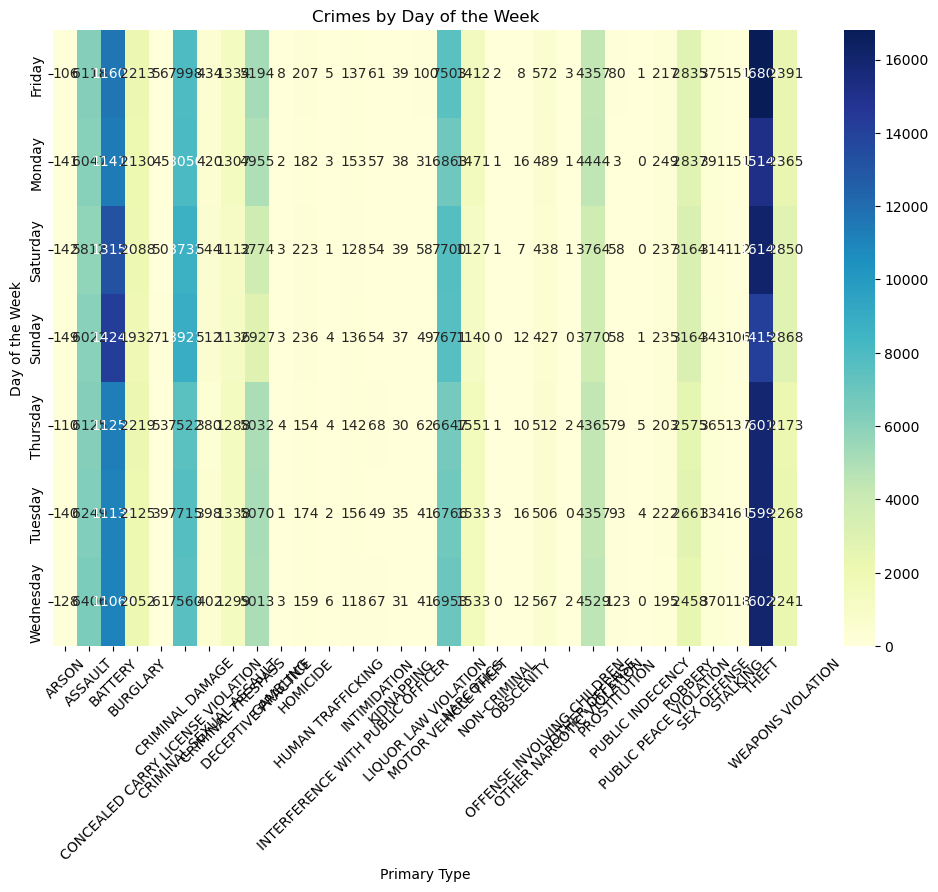

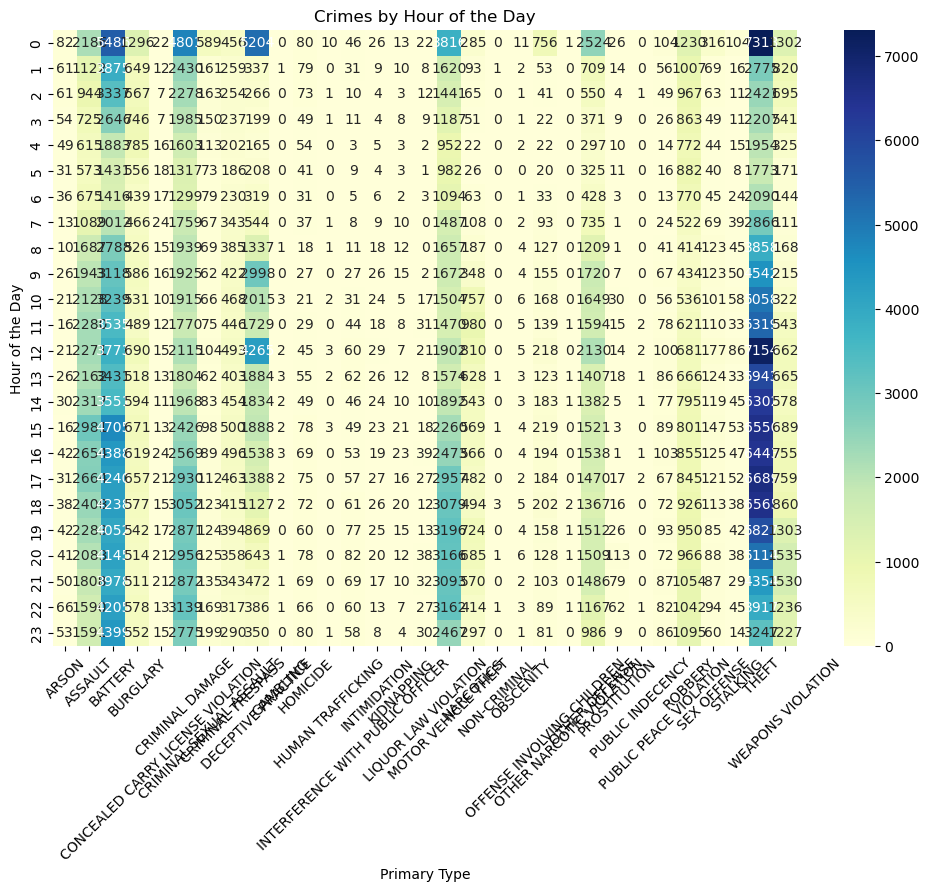

In [17]:
two_years_ago = pd.to_datetime('today') - pd.DateOffset(years=2)
filtered_data = crime_df[crime_df['date'] >= two_years_ago]

# Extract day of the week and hour of the day
filtered_data['DayOfWeek'] = filtered_data['Date'].dt.day_name()
filtered_data['HourOfDay'] = filtered_data['Date'].dt.hour

# Create a heatmap to visualize crimes by day of the week
day_of_week_crimes = filtered_data.groupby(['DayOfWeek', 'primary_type']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(day_of_week_crimes, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Crimes by Day of the Week')
plt.xlabel('Primary Type')
plt.ylabel('Day of the Week')
plt.xticks(rotation=45)
plt.show()

# Create a heatmap to visualize crimes by hour of the day
hour_of_day_crimes = filtered_data.groupby(['HourOfDay', 'primary_type']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(hour_of_day_crimes, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Crimes by Hour of the Day')
plt.xlabel('Primary Type')
plt.ylabel('Hour of the Day')
plt.xticks(rotation=45)
plt.show()


1.  Overall Crime Trends by Day:

    -   The highest number of crimes, particularly for `BATTERY`, occurs on weekends (Saturday and Sunday), suggesting a possible link between weekend activities and the frequency of such incidents.
    -   `THEFT` and `CRIMINAL DAMAGE` consistently rank high across all days, indicating their common occurrence in the city.
    -   Interestingly, `ASSAULT` and `BATTERY` incidents are relatively lower on weekdays compared to weekends.
2.  Specific Crimes and Day Patterns:

    -   `ARSON` shows no significant variation across days, suggesting no specific day-wise pattern.
    -   `HOMICIDE` rates are slightly higher on weekends, especially on Sundays.
    -   `SEX OFFENSES` and `STALKING` maintain a relatively consistent occurrence throughout the week.
    -   `WEAPONS VIOLATION` peaks on weekends, particularly on Saturday.
3.  Day-Specific Unique Trends:

    -   `CRIMINAL SEXUAL ASSAULT` is notably higher on weekends, with a peak on Saturday.
    -   `DECEPTIVE PRACTICE` incidents are significantly higher on Fridays, possibly related to the end of the business week.

### Analysis of Crimes by Hour of the Day

1.  Overall Hourly Crime Trends:

    -   Thefts peak during midday hours, suggesting a correlation with higher pedestrian and commercial activity.
    -   Violent crimes like `BATTERY`, `ASSAULT`, and `ROBBERY` have a distinct peak during late evening and early morning hours (0-3 AM), coinciding with nightlife hours.
2.  Specific Crime and Time Patterns:

    -   `ARSON` incidents are more frequent during the late-night hours.
    -   `HOMICIDE` occurrences are higher during late evening and early morning hours, with a notable peak at midnight.
    -   `NARCOTICS` related offenses have two peaks, one in the early afternoon and another in the late evening.
3.  Hour-Specific Unique Trends:

    -   `MOTOR VEHICLE THEFT` shows a steady increase from early morning, peaking in the evening hours, possibly linked to the availability of unattended vehicles.
    -   `SEX OFFENSES` are more frequent during nighttime and early morning hours.

### Cross-Analysis (Day vs. Hour)

1.  Intersecting Patterns:

    -   Violent crimes like `BATTERY` and `ASSAULT` show a compounding effect on weekends during late-night hours.
    -   `THEFT` and `DECEPTIVE PRACTICE` are consistently high during daytime across all days, with a notable increase on weekdays, possibly correlating with the working population's routines.
2.  Distinctive Anomalies:

    -   Certain crimes like `PUBLIC PEACE VIOLATION` and `PROSTITUTION` show distinct peaks at specific times, suggesting potential for targeted law enforcement efforts during these periods.

In [42]:
crime_gdf.head(5)

,date,location,district,block,y_coordinate,latitude,description,location_description,updated_on,community_area,iucr,x_coordinate,ward,case_number,year,domestic,fbi_code,longitude,beat,primary_type,arrest,id,Date,Year,Month,geometry,index_right,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,Neighborhood
0,2023-12-31 23:59:00,"{'latitude': '41.900698378', 'human_address': ...",18.0,010XX N ORLEANS ST,1907173.0,41.900698,TO VEHICLE,STREET,2024-01-08T15:59:56.000,8.0,1320,1173727.0,27.0,JH103488,2023,False,14,-87.637330,1823,CRIMINAL DAMAGE,False,13327763,2023-12-31 23:59:00,2023,12,POINT (-87.63733 41.90070),36,NEAR NORTH SIDE,0,76675895.9728,0,8,8,0,0,57293.1649516,Central
8,2023-12-31 23:40:00,"{'latitude': '41.892753031', 'human_address': ...",18.0,006XX N MICHIGAN AVE,1904307.0,41.892753,AUTOMOBILE,STREET,2024-01-08T15:59:56.000,8.0,0910,1177327.0,42.0,JH100137,2023,False,07,-87.624194,1834,MOTOR VEHICLE THEFT,False,13324894,2023-12-31 23:40:00,2023,12,POINT (-87.62419 41.89275),36,NEAR NORTH SIDE,0,76675895.9728,0,8,8,0,0,57293.1649516,Central
12,2023-12-31 23:31:00,"{'latitude': '41.887919288', 'human_address': ...",18.0,003XX N STATE ST,1902537.0,41.887919,OTHER VIOLATION,STREET,2024-01-08T15:59:56.000,8.0,2890,1176300.0,42.0,JH100154,2023,False,24,-87.628019,1831,PUBLIC PEACE VIOLATION,True,13324901,2023-12-31 23:31:00,2023,12,POINT (-87.62802 41.88792),36,NEAR NORTH SIDE,0,76675895.9728,0,8,8,0,0,57293.1649516,Central
46,2023-12-31 22:34:00,"{'latitude': '41.909959349', 'human_address': ...",18.0,015XX N SEDGWICK ST,1910545.0,41.909959,SIMPLE,APARTMENT,2024-01-08T15:59:56.000,8.0,0460,1173366.0,27.0,JG561296,2023,False,08B,-87.638555,1821,BATTERY,False,13325268,2023-12-31 22:34:00,2023,12,POINT (-87.63856 41.90996),36,NEAR NORTH SIDE,0,76675895.9728,0,8,8,0,0,57293.1649516,Central
77,2023-12-31 21:40:00,"{'latitude': '41.903165497', 'human_address': ...",18.0,0000X W ELM ST,1908090.0,41.903165,UNLAWFUL POSSESSION - HANDGUN,STREET,2024-01-08T15:59:56.000,8.0,143A,1175923.0,2.0,JG561305,2023,False,15,-87.629236,1824,WEAPONS VIOLATION,True,13324787,2023-12-31 21:40:00,2023,12,POINT (-87.62924 41.90317),36,NEAR NORTH SIDE,0,76675895.9728,0,8,8,0,0,57293.1649516,Central


# Spatial Distribution of Crimes

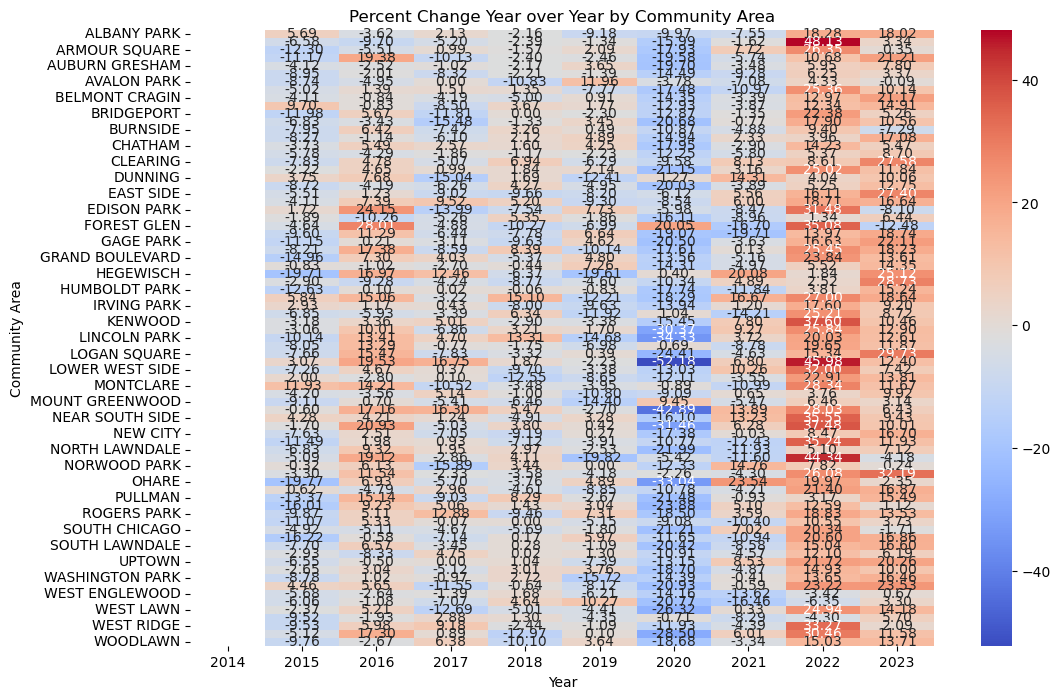

In [69]:
crime_counts = crime_gdf.groupby(['community', 'Year']).size().reset_index(name='crime_count')

pivot_table = crime_counts.pivot(index='community', columns='Year', values='crime_count')

percent_changes = pivot_table.pct_change(axis='columns') * 100

plt.figure(figsize=(12, 8))
sns.heatmap(percent_changes, cmap='coolwarm', annot=True, fmt='.2f', cbar=True)
plt.title('Percent Change Year over Year by Community Area')
plt.xlabel('Year')
plt.ylabel('Community Area')
plt.show()



Increasing Trend in Recent Years:

-   Several communities, such as `ALBANY PARK`, `ASHBURN`, and `AUBURN GRESHAM`, show an increasing trend in crime rates in the most recent years (2022 and 2023). This could be a concern and warrants further investigation into the causes.

In [81]:
geo_data = gpd.read_file('/Users/rashidbaset/Documents/my-projects/crime-home-price-prediction-capstone/chicago-crime-property-analysis/boundries-chicago.geojson')

crime_counts = crime_gdf.groupby('community').size().reset_index(name='crime_count')

merged_data = geo_data.merge(crime_counts, left_on='community', right_on='community')

latitude_of_chicago = 41.8781
longitude_of_chicago = -87.6298
m = folium.Map(location=[latitude_of_chicago, longitude_of_chicago], zoom_start=11)

folium.Choropleth(
    geo_data=merged_data.__geo_interface__,
    name='choropleth',
    data=merged_data,
    columns=['community', 'crime_count'],
    key_on='feature.properties.community', 
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Crime Rate'
).add_to(m)

m.save('chicago_crime_heatmap.html')
m #


# Crime Type Distribution 

## Frequency Analysis of Crime Types

/Users/rashidbaset/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rashidbaset/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


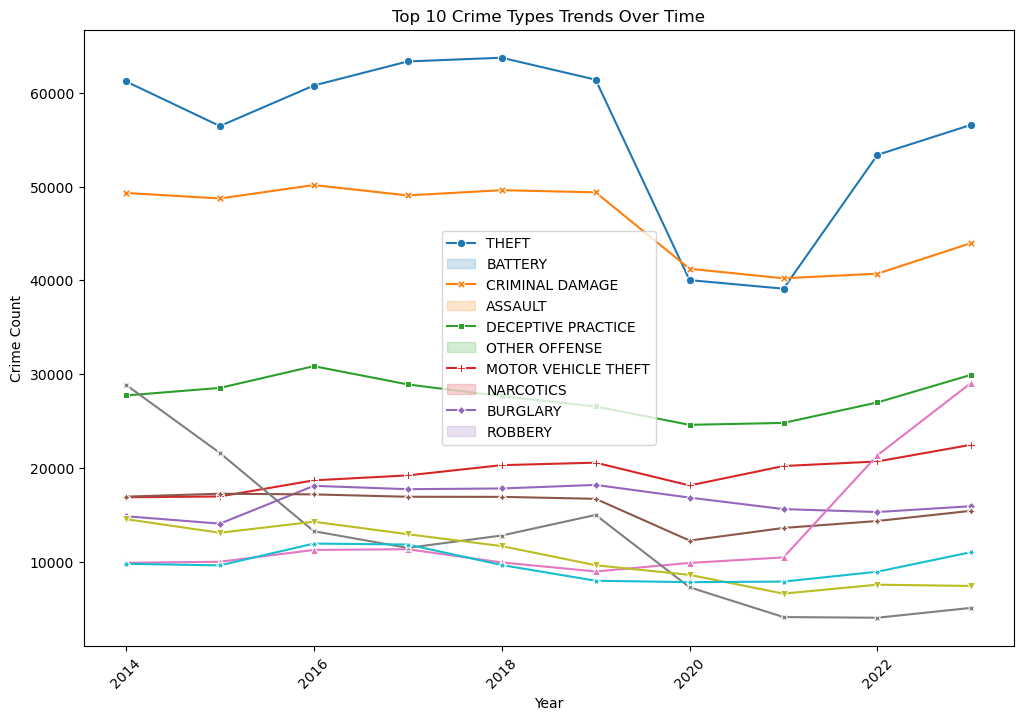

In [85]:
crime_type_counts = crime_gdf.groupby(['primary_type', 'Year']).size().reset_index(name='crime_count')

pivot_table = crime_type_counts.pivot(index='primary_type', columns='Year', values='crime_count').fillna(0)

top_n = 10  # Change this value to select the top N crime types
top_crime_types = pivot_table.sum(axis=1).sort_values(ascending=False).head(top_n).index
top_crimes = pivot_table.loc[top_crime_types]

plt.figure(figsize=(12, 8))
sns.lineplot(data=top_crimes.T, dashes=False, markers=True)
plt.title(f'Top {top_n} Crime Types Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.legend(top_crime_types)
plt.xticks(rotation=45)
plt.show()


## Subcategory Analysis